In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd

df_actors = pd.read_csv('../Datasets/IMDB/actorfilms.csv', low_memory=False)

From this we can see in which films actors were in.

In [3]:
df_actors

Actor    ActorID                            Film  Year  \
0              Fred Astaire  nm0000001                     Ghost Story  1981   
1              Fred Astaire  nm0000001                 The Purple Taxi  1977   
2              Fred Astaire  nm0000001           The Amazing Dobermans  1976   
3              Fred Astaire  nm0000001            The Towering Inferno  1974   
4              Fred Astaire  nm0000001                       Midas Run  1969   
...                     ...        ...                             ...   ...   
191868  Roman Griffin Davis  nm9877392                     Jojo Rabbit  2019   
191869            Lexi Rabe  nm9962642                       Silk Road  2021   
191870            Lexi Rabe  nm9962642               Avengers: Endgame  2019   
191871            Lexi Rabe  nm9962642  Godzilla: King of the Monsters  2019   
191872      Inde Navarrette  nm9984699                   Wander Darkly  2020   

         Votes  Rating     FilmID  
0         7731     6.3  tt0082449  
1          533     6.6  tt0076851  
2          369     5.3  tt0074130  
3        39888     7.0  tt0072308  
4          123     4.8  tt0064664  
...        ...     ...        ...  
191868  310904     7.9  tt2584384  
191869    2050     5.9  tt7937254  
191870  849079     8.4  tt4154796  
191871  146737     6.0  tt3741700  
191872     776     5.8  tt8902978  

[191873 rows x 7 columns]

In [4]:
actors_set = set(df_actors['Actor'].tolist())

In [5]:
print("We have " +str(len(actors_set)) + " actors")

We have 9615 actors


We will cut out actors who had their first movies before 1980, because we wanted to work with this generation actors

In [6]:
# cut out actors whose first film was before 1980

actors_after_1980 = set()
for actor in actors_set:
    actor_films = df_actors[df_actors['Actor'] == actor]
    first_film_year = actor_films['Year'].min()
    if first_film_year >= 1980:
        actors_after_1980.add(actor)

In [7]:
#We will work with this many actors
print(f"We will only work with {len(actors_after_1980)} actors")

We will only work with 7724 actors


This dataframe maps the movieids to the directoids and writers.

In [8]:
df_movie_directors = pd.read_csv('../Datasets/IMDB/title.crew.tsv', sep='\t', low_memory=False)

In [9]:
df_movie_directors

tconst   directors  \
0         tt0000001   nm0005690   
1         tt0000002   nm0721526   
2         tt0000003   nm0721526   
3         tt0000004   nm0721526   
4         tt0000005   nm0005690   
...             ...         ...   
12048914  tt9916848   nm1485677   
12048915  tt9916850   nm1485677   
12048916  tt9916852   nm1485677   
12048917  tt9916856  nm10538645   
12048918  tt9916880   nm0996406   

                                                    writers  
0                                                        \N  
1                                                        \N  
2                                                 nm0721526  
3                                                        \N  
4                                                        \N  
...                                                     ...  
12048914  nm9187127,nm1485677,nm9826385,nm9299459,nm1628284  
12048915            nm9187127,nm1485677,nm9826385,nm1628284  
12048916  nm9187127,nm1485677,nm9826385,nm9299459,nm1628284  
12048917                                          nm6951431  
12048918                                nm1482639,nm2586970  

[12048919 rows x 3 columns]

This maps together multiple ids to actors, directors,writers, etc.

In [10]:
df_name_to_id = pd.read_csv('../Datasets/IMDB/name.basics.tsv', sep='\t', low_memory=False)

In [11]:
df_name_to_id

nconst         primaryName birthYear deathYear  \
0         nm0000001        Fred Astaire      1899      1987   
1         nm0000002       Lauren Bacall      1924      2014   
2         nm0000003     Brigitte Bardot      1934        \N   
3         nm0000004        John Belushi      1949      1982   
4         nm0000005      Ingmar Bergman      1918      2007   
...             ...                 ...       ...       ...   
14859444  nm9993714   Romeo del Rosario        \N        \N   
14859445  nm9993716       Essias Loberg        \N        \N   
14859446  nm9993717  Harikrishnan Rajan        \N        \N   
14859447  nm9993718         Aayush Nair        \N        \N   
14859448  nm9993719          Andre Hill        \N        \N   

                            primaryProfession  \
0                actor,miscellaneous,producer   
1            actress,miscellaneous,soundtrack   
2           actress,music_department,producer   
3               actor,writer,music_department   
4                       writer,director,actor   
...                                       ...   
14859444  animation_department,art_department   
14859445                                   \N   
14859446                      cinematographer   
14859447                      cinematographer   
14859448                                   \N   

                                   knownForTitles  
0         tt0072308,tt0050419,tt0027125,tt0025164  
1         tt0037382,tt0075213,tt0038355,tt0117057  
2         tt0057345,tt0049189,tt0056404,tt0054452  
3         tt0072562,tt0077975,tt0080455,tt0078723  
4         tt0050986,tt0069467,tt0083922,tt0050976  
...                                           ...  
14859444          tt11657662,tt14069590,tt2455546  
14859445                                       \N  
14859446                                tt8736744  
14859447                                tt8736744  
14859448                                       \N  

[14859449 rows x 6 columns]

We make a graph where actors and directors are nodes and there is directed links between actors to directors if they worked with them. The edge weight indicate how many times.

In [12]:
from Artist_Director_Graph.actor_director_functions import making_director_actor_graph
import pandas as pd

# Pre-compute lookups
movie_directors_dict = df_movie_directors.set_index('tconst')['directors'].to_dict()
name_lookup = df_name_to_id.set_index('nconst')['primaryName'].to_dict()

# Filter actors data once and group by actor
actors_filtered = df_actors[df_actors['Actor'].isin(actors_after_1980)]
actors_grouped = actors_filtered.groupby('Actor')

# Initialize graph with all actors at once
actors_director_graph = making_director_actor_graph(actors_after_1980, actors_grouped,movie_directors_dict, name_lookup)

In [13]:
actors_director_graph.number_of_edges()

127130

In [14]:
actors_director_graph.number_of_nodes()

23883

We could not find a dataset about how established a director is, so we used this movies.csv and directors.csv. We took the movies after 1990 and then calculated the directors' popularity based on the popularity of their movies.

In [15]:
import networkx as nx
largest_cc_nodes = max(nx.connected_components(actors_director_graph.to_undirected()), key=len)
actors_director_graph = actors_director_graph.subgraph(largest_cc_nodes).copy()

In [16]:
actors_director_graph.number_of_edges()

127081

In [17]:
actors_director_graph.number_of_nodes()

23809

Here we collect the popular directors. As there are no director popularity datasets available, we took the IMDb movies.csv and... (leírni, hogy mivan)

In [18]:
from Artist_Director_Graph.actor_director_functions import get_popular_directors


#We use the IMDb dataset and get rid of movies before 1990
df_movies_IMDB = pd.read_csv('../Datasets/IMDb movies.csv', index_col=0, low_memory=False)
df_movies_IMDB = df_movies_IMDB[pd.to_numeric(df_movies_IMDB['year'], errors='coerce') >= 1990]

# Sort by average popularity
director_stats_sorted = get_popular_directors(df_movies_IMDB)


We can see that there are indeed popular directors at the beginning of the list

In [19]:
director_stats_sorted

director  total_popularity  num_movies
4911   Christopher Nolan        99486881.7          11
21629  Quentin Tarantino        75651625.0          12
25560   Steven Spielberg        64856945.6          20
21042      Peter Jackson        60483109.9          11
6127       David Fincher        56634054.9          10
...                  ...               ...         ...
27983      Waleed Bedour             139.2           1
18524    Michele Lunella             138.6           1
12405      Jianrong Zhuo             133.1           1
388     Aeneas Middleton             128.7           1
21936  Ramana Reddy B.V.             107.0           1

[29023 rows x 3 columns]

In [20]:
from Artist_Director_Graph.actor_director_functions import visualize_actor_director_graph_500_nodes

visualize_actor_director_graph_500_nodes(actors_director_graph)

Here we performed community detection with the Louvain-algorithm. (lehet mégse, mert jobb eredményt ad, ha nem)
We filtered the graph by only leaving the nodes with at least 10 degrees.

Louvain detected 31 communities
The modularity: 0.4175


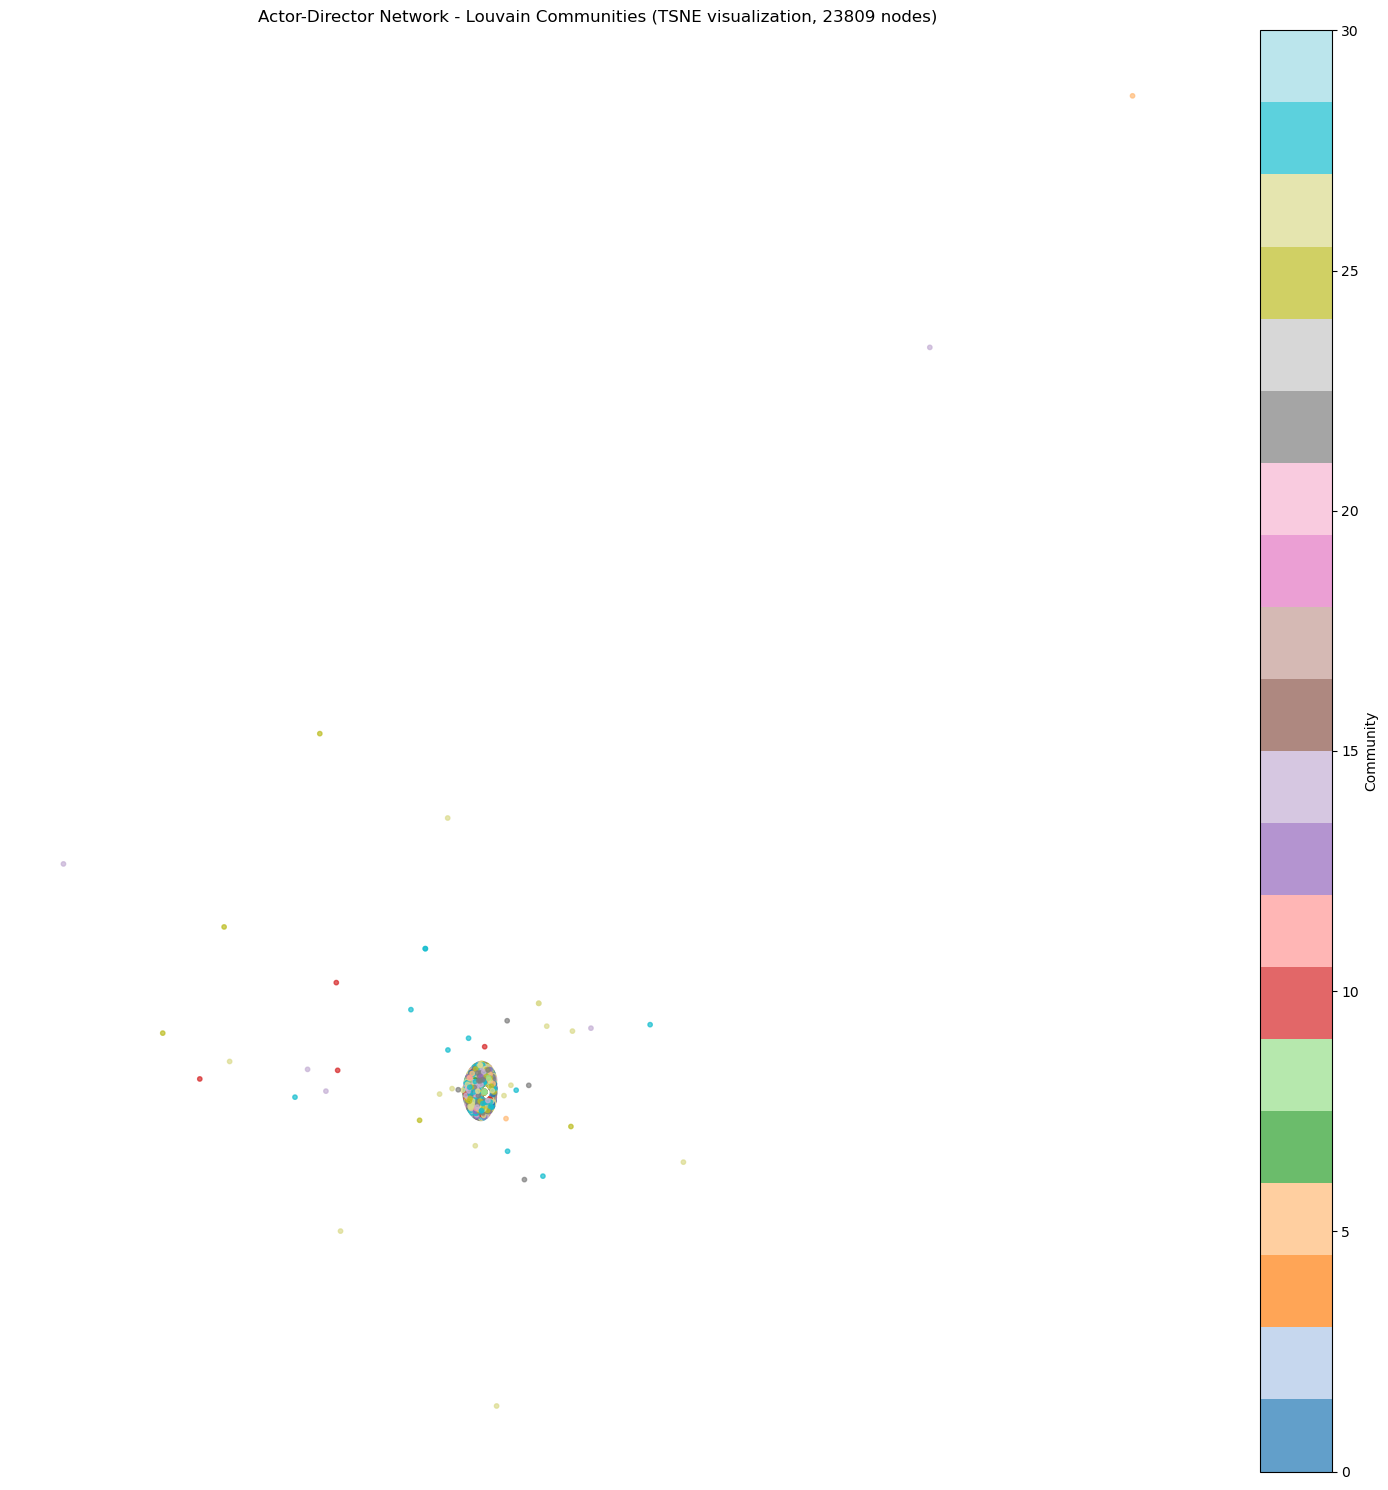


Reduced from 23809 to 23809 nodes
Number of communities detected: 31

Community sizes:
  Community 26: 3903 members
  Community 21: 3885 members
  Community 27: 3501 members
  Community 14: 3078 members
  Community 22: 1498 members
  Community 0: 1368 members
  Community 25: 1059 members
  Community 10: 1019 members
  Community 24: 699 members
  Community 12: 639 members


In [21]:

from Artist_Director_Graph.actor_director_functions import filter_graph, calculate_partition, \
    visualize_louvain_communities, make_louvain_communities
import numpy as np
import networkx as nx
from networkx.algorithms.community import louvain_communities, modularity

# Filter graph first, we only leave the nodes with at least 10 degree
#filtered_graph = filter_graph(degree_threshold=10, actors_director_graph=actors_director_graph)
filtered_graph = actors_director_graph

cluster_labels,nodes, embeddings = make_louvain_communities(filtered_graph, actors_director_graph)

Here we print some of the members from each community

In [22]:
from Artist_Director_Graph.actor_director_functions import clusters_to_node, print_members_for_each_clusters

# Create a dictionary mapping cluster to nodes
cluster_to_nodes = clusters_to_node(nodes, cluster_labels)
# Print members of each cluster
print_members_for_each_clusters(cluster_to_nodes)


Cluster 0 (1368 members):
Alessio Boni, Daniela Melchior, Andy Nyman, Aron Piper, Audrey Fleurot, Miguel Angel Silvestre, Efrat Dor, Carolina Yuste, Miguel Herran, Grey Damon
... and 1358 more

Cluster 1 (4 members):
Helena Zengel, Leonie Krippendorff, Mascha Schilinski, Nora Fingscheidt

Cluster 2 (4 members):
Kiki Sukezane, Shigeaki Kubo, Tsuyoshi Nakakuki, FINT

Cluster 3 (5 members):
Charlotte Best, Anthony Pedone, Martin McKenna, Craig Boreham, Nik Kacevski

Cluster 4 (27 members):
Hisham Tawfiq, Paula Abdul, Cagatay Ulusoy, Johnny Young, Jaden Smith, Engin Altan Duzyatan, Simone Missick, Madison Bailey, Noel Black, Togan Gökbakar
... and 17 more

Cluster 5 (526 members):
Lauren Hammersley, Julian Richings, Reid Ewing, Steve Lund, Q'orianka Kilcher, Jon Cor, Siobhan Murphy, Robb Wells, Kaniehtiio Horn, Jesse Rath
... and 516 more

Cluster 6 (61 members):
Roman Griffin Davis, Craig Hall, Levy Tran, Rachel House, Sara Wiseman, Jemaine Clement, John Williams, Thomasin McKenzie, Scot

We delete the clusters which have only one members

In [23]:
# Filter out singleton clusters (clusters with only 1 member)
singleton_clusters = [cluster_id for cluster_id, members in cluster_to_nodes.items() if len(members) == 1]
print(f"Found {len(singleton_clusters)} singleton clusters to remove: {sorted(singleton_clusters)}")

# Keep only clusters with more than 1 member
cluster_to_nodes = {cluster_id: members for cluster_id, members in cluster_to_nodes.items() if len(members) > 1}

# Update nodes and cluster_labels to match
# Create a mapping from old cluster IDs to new cluster IDs
old_to_new_cluster = {}
new_cluster_id = 0
for old_cluster_id in sorted(cluster_to_nodes.keys()):
    old_to_new_cluster[old_cluster_id] = new_cluster_id
    new_cluster_id += 1

# Update cluster_to_nodes with new IDs
cluster_to_nodes = {old_to_new_cluster[old_id]: members for old_id, members in cluster_to_nodes.items()}

# Filter nodes and cluster_labels to only include nodes in remaining clusters
nodes_to_keep_set = set()
for members in cluster_to_nodes.values():
    nodes_to_keep_set.update(members)

# Create new filtered arrays
new_nodes = []
new_cluster_labels = []
new_embeddings = []
for i, node in enumerate(nodes):
    if node in nodes_to_keep_set:
        new_nodes.append(node)
        # Find which cluster this node belongs to (using new IDs)
        for new_id, members in cluster_to_nodes.items():
            if node in members:
                new_cluster_labels.append(new_id)
                break
        new_embeddings.append(embeddings[i])

# Update the arrays
nodes = new_nodes
cluster_labels = np.array(new_cluster_labels)
embeddings = np.array(new_embeddings)

print(f"\nAfter filtering:")
print(f"  Remaining clusters: {len(cluster_to_nodes)}")
print(f"  Remaining nodes: {len(nodes)}")
print(f"  Total members across all clusters: {sum(len(members) for members in cluster_to_nodes.values())}")

Found 0 singleton clusters to remove: []

After filtering:
  Remaining clusters: 31
  Remaining nodes: 23809
  Total members across all clusters: 23809


We can see that the nodes with the biggest degree centrality are all established directors.

In [24]:
# Get degree centrality for filtered graph
degree_centrality = nx.degree_centrality(filtered_graph)
sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)[:10]

[('Steven Spielberg', 0.012222782258064517),
 ('Woody Allen', 0.012096774193548388),
 ('Steven Soderbergh', 0.009660618279569893),
 ('Ridley Scott', 0.009366599462365592),
 ('Clint Eastwood', 0.009324596774193549),
 ('Michael Bay', 0.009072580645161291),
 ('James Franco', 0.00835853494623656),
 ('Oliver Stone', 0.007854502688172043),
 ('Danny Trejo', 0.007728494623655915),
 ('Robert Rodriguez', 0.007476478494623656)]

For each cluster whe print out the members who have the highest node centrality.

In [25]:
from Artist_Director_Graph.actor_director_functions import find_top_n_members_of_each_cluster

# Find top n members by centrality in each cluster
find_top_n_members_of_each_cluster(5, cluster_to_nodes,degree_centrality, filtered_graph )


Cluster 0 - Top 5 most connected:
  Luis Tosar (degree: 84)
  Valeria Golino (degree: 66)
  Guillaume Canet (degree: 64)
  Beatrice Dalle (degree: 63)
  Andy Nyman (degree: 61)

Cluster 1 - Top 5 most connected:
  Helena Zengel (degree: 4)
  Leonie Krippendorff (degree: 1)
  Mascha Schilinski (degree: 1)
  Nora Fingscheidt (degree: 1)

Cluster 2 - Top 5 most connected:
  Kiki Sukezane (degree: 4)
  Shigeaki Kubo (degree: 1)
  Tsuyoshi Nakakuki (degree: 1)
  FINT (degree: 1)

Cluster 3 - Top 5 most connected:
  Charlotte Best (degree: 4)
  Anthony Pedone (degree: 4)
  Craig Boreham (degree: 2)
  Martin McKenna (degree: 1)
  Nik Kacevski (degree: 1)

Cluster 4 - Top 5 most connected:
  Engin Altan Duzyatan (degree: 11)
  Paula Abdul (degree: 7)
  Jaden Smith (degree: 7)
  Hisham Tawfiq (degree: 5)
  Noel Black (degree: 5)

Cluster 5 - Top 5 most connected:
  Maury Chaykin (degree: 74)
  Julian Richings (degree: 68)
  Graham Greene (degree: 60)
  Colm Feore (degree: 55)
  Atom Egoyan (de

Now we analyze which cluster contains directors with the highest node centrality.

In [26]:
from Artist_Director_Graph.actor_director_functions import calculate_member_centralities, \
    find_cluster_with_highest_avg_centrality

cluster_centralities = calculate_member_centralities(cluster_to_nodes, degree_centrality)

sorted_by_average_centrality = sorted( cluster_centralities.items(), key=lambda x: x[1]['avg_centrality'], reverse=True)

for rank, (cluster_id, data) in enumerate(sorted_by_average_centrality[:10], 1):
    print(f"\n{rank}. Cluster {cluster_id}:")
    print(f"   Avg centrality: {data['avg_centrality']:.6f}")
    print(f"   Size: {data['size']} members")


members_with_centrality = find_cluster_with_highest_avg_centrality(sorted_by_average_centrality, degree_centrality, filtered_graph)




1. Cluster 27:
   Avg centrality: 0.000721
   Size: 3501 members

2. Cluster 25:
   Avg centrality: 0.000581
   Size: 1059 members

3. Cluster 14:
   Avg centrality: 0.000537
   Size: 3078 members

4. Cluster 21:
   Avg centrality: 0.000496
   Size: 3885 members

5. Cluster 22:
   Avg centrality: 0.000437
   Size: 1498 members

6. Cluster 24:
   Avg centrality: 0.000402
   Size: 699 members

7. Cluster 26:
   Avg centrality: 0.000397
   Size: 3903 members

8. Cluster 10:
   Avg centrality: 0.000383
   Size: 1019 members

9. Cluster 15:
   Avg centrality: 0.000346
   Size: 145 members

10. Cluster 7:
   Avg centrality: 0.000298
   Size: 90 members

Cluster 27 has the highest average centrality of 0.000721
Rank   Director or Actor                        Centrality      Degree    
1      Steven Spielberg                         0.012223        291       
2      Woody Allen                              0.012097        288       
3      Steven Soderbergh                        0.009661    

In [27]:

from Artist_Director_Graph.actor_director_functions import visualize_actor_director_graph

visualize_actor_director_graph(embeddings,cluster_labels, nodes )

We can also find people in the clusters with this function

In [28]:
from Artist_Director_Graph.actor_director_functions import find_person_cluster

# Find which cluster contains specific actors/directors

# Example usage
find_person_cluster("Lionel Barrymore", nodes, cluster_labels, cluster_to_nodes)
find_person_cluster("Tom Hanks", nodes, cluster_labels, cluster_to_nodes)

Lionel Barrymore not found (might have been filtered out)
Tom Hanks is in Cluster 27
Other members include: Malcolm Barrett, Hope Davis, Stephen Root, Casey Siemaszko, Sarunas J. Jackson...


In [29]:
director_stats_sorted

director  total_popularity  num_movies
4911   Christopher Nolan        99486881.7          11
21629  Quentin Tarantino        75651625.0          12
25560   Steven Spielberg        64856945.6          20
21042      Peter Jackson        60483109.9          11
6127       David Fincher        56634054.9          10
...                  ...               ...         ...
27983      Waleed Bedour             139.2           1
18524    Michele Lunella             138.6           1
12405      Jianrong Zhuo             133.1           1
388     Aeneas Middleton             128.7           1
21936  Ramana Reddy B.V.             107.0           1

[29023 rows x 3 columns]

In [30]:
director_popularity = director_stats_sorted

In [31]:
from Artist_Director_Graph.actor_director_functions import calculate_popular_directors_for_each_cluster, print_popular_directors_in_each_cluster

# We find the most popular directors
n_popular = 400
popularity_threshold = director_popularity['total_popularity'].nlargest(n_popular).min()  #.quantile(0.75)
popular_directors = set(director_popularity[director_popularity['total_popularity'] >= popularity_threshold]['director'])


print(f"We select the first {len(popular_directors)} directors as popular directors. \n")

# Count popular directors in each cluster
cluster_popular_counts, cluster_popular_directors = calculate_popular_directors_for_each_cluster(cluster_to_nodes,popular_directors)

print_popular_directors_in_each_cluster(cluster_popular_counts, cluster_popular_directors, cluster_to_nodes)

We select the first 400 directors as popular directors. 

Cluster 0: 6 popular directors out of 1368 total members (0.4%)
  Examples: Mathieu Kassovitz, Gabriele Muccino, Olivier Nakache, Éric Toledano, Jean-Pierre Jeunet

Cluster 1: 0 popular directors out of 4 total members (0.0%)

Cluster 2: 0 popular directors out of 4 total members (0.0%)

Cluster 3: 0 popular directors out of 5 total members (0.0%)

Cluster 4: 0 popular directors out of 27 total members (0.0%)

Cluster 5: 0 popular directors out of 526 total members (0.0%)

Cluster 6: 1 popular directors out of 61 total members (1.6%)
  Examples: Taika Waititi

Cluster 7: 1 popular directors out of 90 total members (1.1%)
  Examples: Wes Ball

Cluster 8: 1 popular directors out of 289 total members (0.3%)
  Examples: Neill Blomkamp

Cluster 9: 0 popular directors out of 3 total members (0.0%)

Cluster 10: 8 popular directors out of 1019 total members (0.8%)
  Examples: Eli Roth, Robert Rodriguez, James Wan, Quentin Tarantino, Dav

In [32]:
from Artist_Director_Graph.actor_director_functions import check_how_many_popular_directors_in_the_graph

# Check how many popular directors are actually in the graph nodes
check_how_many_popular_directors_in_the_graph(director_popularity, nodes)


  Found in graph: 14586
  NOT found in graph: 14437

Popular directors IN the graph:
  - Christopher Nolan
  - Quentin Tarantino
  - Steven Spielberg
  - Peter Jackson
  - David Fincher
  - Martin Scorsese
  - Ridley Scott
  - Frank Darabont
  - Robert Zemeckis
  - Clint Eastwood

Popular directors NOT in the graph (name mismatch or filtered out):
  - Mike Thurmeier
  - Jee-woon Kim
  - Ki-duk Kim
  - Andrew Lau
  - Damián Szifron
  - Amole Gupte
  - Aamir Khan
  - Sang-ho Yeon
  - Alper Caglar
  - Galder Gaztelu-Urrutia



In [33]:
from Artist_Director_Graph.actor_director_functions import list_actors_who_worked_with_popular_directors_in_cluster
# For each cluster, list actors who worked with popular directors
list_actors_who_worked_with_popular_directors_in_cluster(cluster_to_nodes, cluster_popular_directors, filtered_graph)


CLUSTER 0 - 6 popular director(s)

Mathieu Kassovitz:
  Worked with 11 actors in this cluster
  Top collaborators:
    - Mathieu Kassovitz (4 films)
    - Vincent Cassel (3 films)
    - Halle Berry (1 film)
    - John Carroll Lynch (1 film)
    - Mark Strong (1 film)
    - Said Taghmaoui (1 film)
    - Vin Diesel (1 film)
    - Melanie Thierry (1 film)
    - Charles S. Dutton (1 film)
    - Penelope Cruz (1 film)

Gabriele Muccino:
  Worked with 38 actors in this cluster
  Top collaborators:
    - Pierfrancesco Favino (4 films)
    - Octavia Spencer (2 films)
    - Will Smith (2 films)
    - Monica Bellucci (1 film)
    - Jessica Biel (1 film)
    - Kurt Fuller (1 film)
    - Diane Kruger (1 film)
    - Janet McTeer (1 film)
    - Thandiwe Newton (1 film)
    - Judy Greer (1 film)

Olivier Nakache:
  Worked with 6 actors in this cluster
  Top collaborators:
    - Omar Sy (4 films)
    - Audrey Fleurot (1 film)
    - Charlotte Gainsbourg (1 film)
    - Tahar Rahim (1 film)
    - Vincen

We have a celebrity dataset which sort the most popular actors with a popularity sort. We check which cluster contains popular actors and we take the mean of their popularity.

In [34]:
from Artist_Director_Graph.actor_director_functions import clusters_by_average_actors_popularity

# Load celebrity data
df_celebrity = pd.read_csv('../Datasets/Celebrity.csv', index_col=0)

actor_popularity_map = clusters_by_average_actors_popularity(df_celebrity, cluster_to_nodes)

Clusters ranked by average actor popularity:
Cluster 9: 44.79
Cluster 15: 42.19
Cluster 6: 42.00
Cluster 23: 40.21
Cluster 21: 38.63
Cluster 25: 38.30
Cluster 14: 38.13
Cluster 27: 37.96
Cluster 10: 37.77
Cluster 7: 36.35
Cluster 0: 35.89
Cluster 11: 35.88
Cluster 22: 35.68
Cluster 24: 34.18
Cluster 19: 33.38
Cluster 26: 33.36
Cluster 12: 32.98
Cluster 20: 32.56
Cluster 5: 32.41
Cluster 13: 31.68
Cluster 30: 30.39
Cluster 8: 28.62
Cluster 4: 22.67


In [35]:
from Artist_Director_Graph.actor_director_functions import map_nodes_to_cluster, calculate_edges_between_clusters, \
    calculate_between_cluster_connections

# Create a mapping of node to cluster
node_to_cluster = map_nodes_to_cluster(cluster_to_nodes)

# Count edges between clusters
n_clusters, inter_cluster_edges = calculate_edges_between_clusters(cluster_to_nodes, filtered_graph, node_to_cluster)

# Show inter-cluster connections
calculate_between_cluster_connections(n_clusters, inter_cluster_edges, cluster_to_nodes)

Inter-cluster connections (edges between clusters):

Top 15 inter-cluster connections:
1. Cluster 26 -> Cluster 27: 3452 edges
2. Cluster 14 -> Cluster 27: 3193 edges
3. Cluster 27 -> Cluster 26: 2941 edges
4. Cluster 21 -> Cluster 27: 2938 edges
5. Cluster 27 -> Cluster 14: 2894 edges
6. Cluster 27 -> Cluster 21: 2836 edges
7. Cluster 14 -> Cluster 26: 1504 edges
8. Cluster 26 -> Cluster 14: 1478 edges
9. Cluster 14 -> Cluster 21: 1443 edges
10. Cluster 25 -> Cluster 27: 1416 edges
11. Cluster 27 -> Cluster 25: 1307 edges
12. Cluster 21 -> Cluster 14: 1294 edges
13. Cluster 14 -> Cluster 25: 1081 edges
14. Cluster 25 -> Cluster 14: 1039 edges
15. Cluster 26 -> Cluster 21: 1003 edges
Summary by cluster:
Cluster 0: Internal=2156, Outgoing=1414, Incoming=1010
Cluster 1: Internal=3, Outgoing=1, Incoming=0
Cluster 2: Internal=3, Outgoing=1, Incoming=0
Cluster 3: Internal=4, Outgoing=0, Incoming=4
Cluster 4: Internal=26, Outgoing=16, Incoming=15
Cluster 5: Internal=724, Outgoing=1008, Incom

In [36]:
from Artist_Director_Graph.actor_director_functions import clusters_by_incoming_edges

# Rank clusters by incoming edges
clusters_by_incoming_edges(cluster_to_nodes, inter_cluster_edges, n_clusters)

Clusters ranked by INCOMING edges (actors from other clusters working with directors in this cluster):
1. Cluster 27: 14828 incoming edges (3501 members)
2. Cluster 14: 8939 incoming edges (3078 members)
3. Cluster 26: 8669 incoming edges (3903 members)
4. Cluster 21: 8459 incoming edges (3885 members)
5. Cluster 25: 4694 incoming edges (1059 members)
6. Cluster 22: 3685 incoming edges (1498 members)
7. Cluster 10: 2465 incoming edges (1019 members)
8. Cluster 24: 1863 incoming edges (699 members)
9. Cluster 0: 1010 incoming edges (1368 members)
10. Cluster 5: 869 incoming edges (526 members)
11. Cluster 13: 614 incoming edges (598 members)
12. Cluster 12: 572 incoming edges (639 members)
13. Cluster 11: 273 incoming edges (340 members)
14. Cluster 15: 264 incoming edges (145 members)
15. Cluster 7: 157 incoming edges (90 members)
16. Cluster 8: 157 incoming edges (289 members)
17. Cluster 6: 79 incoming edges (61 members)
18. Cluster 23: 71 incoming edges (254 members)
19. Cluster 20:

We analyze how many actors were working with popular directors in the beginning, middle or ending of their careers

In [42]:
# Use the actor_director_analysis module
from actor_director_analysis import ActorDirectorAnalyzer

# Initialize analyzer with existing data
analyzer = ActorDirectorAnalyzer(
    cluster_to_nodes=cluster_to_nodes,
    name_lookup=name_lookup,
    min_films=5,
    min_career_length=5,
    popularity_percentile=0.75
)

# Note: The module expects different file paths, so we need to adjust
# Update the load_data method to use our existing dataframes
def load_data_from_existing(self):
    """Use already loaded dataframes instead of loading from disk."""
    return df_celebrity, df_actors, df_movie_directors

# Monkey patch the load_data method to use our existing data
analyzer.load_data = lambda: (df_celebrity, df_actors, df_movie_directors)

# Run the analysis for cluster 4
results = analyzer.analyze_all_actors(cluster_id=22)



Loading datasets...
Identifying popular actors...
Creating director lookup...
Analyzing 2182 popular actors...
Cluster 22 has 1498 directors

  Processed 100/2182 actors...
  Processed 200/2182 actors...
  Processed 300/2182 actors...
  Processed 400/2182 actors...
  Processed 500/2182 actors...
  Processed 600/2182 actors...
  Processed 700/2182 actors...
  Processed 800/2182 actors...
  Processed 900/2182 actors...
  Processed 1000/2182 actors...
  Processed 1100/2182 actors...
  Processed 1200/2182 actors...
  Processed 1300/2182 actors...
  Processed 1400/2182 actors...
  Processed 1500/2182 actors...
  Processed 1600/2182 actors...
  Processed 1700/2182 actors...
  Processed 1800/2182 actors...
  Processed 1900/2182 actors...
  Processed 2000/2182 actors...
  Processed 2100/2182 actors...


In [43]:
print(results)

[ActorCareerAnalysis(actor='Benedict Wong', career_start=2001, career_end=2021, career_length=20, total_films=27, num_collabs=4, avg_collab_year=2021.0, career_position=1.0, career_phase='Late', collabs=[Collaboration(year=2021.0, film='Raya and the Last Dragon', director='Paul Briggs', film_id='tt5109280'), Collaboration(year=2021.0, film='Raya and the Last Dragon', director='John Ripa', film_id='tt5109280'), Collaboration(year=2021.0, film='Raya and the Last Dragon', director='Don Hall', film_id='tt5109280'), Collaboration(year=2021.0, film='Raya and the Last Dragon', director='Carlos López Estrada', film_id='tt5109280')]), ActorCareerAnalysis(actor='Rebecca Romijn', career_start=1998, career_end=2019, career_length=21, total_films=21, num_collabs=2, avg_collab_year=2019.0, career_position=1.0, career_phase='Late', collabs=[Collaboration(year=2019.0, film='Reign of the Supermen', director='Jake Castorena', film_id='tt7167686'), Collaboration(year=2019.0, film='Reign of the Supermen',

In [44]:
# Print the detailed report
if results:
    analyzer.print_detailed_report(results, top_n=10)
else:
    print("No actors found matching the criteria.")


Found 722 popular actors who worked with Cluster 22 directors

LATE CAREER COLLABORATIONS (last third): 305 actors (42.2%)

Benedict Wong:
  Career: 2001-2021 (20 years, 27 films)
  Career position of Cluster 22 collabs: 100.0%
  Number of collaborations: 4
    - Raya and the Last Dragon (2021) with Paul Briggs
    - Raya and the Last Dragon (2021) with John Ripa
    - Raya and the Last Dragon (2021) with Don Hall
    ... and 1 more

Rebecca Romijn:
  Career: 1998-2019 (21 years, 21 films)
  Career position of Cluster 22 collabs: 100.0%
  Number of collaborations: 2
    - Reign of the Supermen (2019) with Jake Castorena
    - Reign of the Supermen (2019) with Sam Liu

Shelley Duvall:
  Career: 1970-2002 (32 years, 23 films)
  Career position of Cluster 22 collabs: 100.0%
  Number of collaborations: 1
    - Manna from Heaven (2002) with Gabrielle Burton

Stephen Colbert:
  Career: 1999-2014 (15 years, 10 films)
  Career position of Cluster 22 collabs: 100.0%
  Number of collaborations:

In [50]:
from Artist_Director_Graph.actor_director_functions import list_actors_in_cluster

# Example: List actors from cluster 22 (which has high average popularity)
actors_list = list_actors_in_cluster(cluster_to_nodes, actor_popularity_map, actors_after_1980, 0, show_top_n=20)

ACTORS IN CLUSTER 0
Total members: 833
Actors identified: 120
Directors/Other: 713

Top 20 Actors by Popularity:

 1. Bae Doona                                (Popularity: 81.83)
 2. Nathalie Emmanuel                        (Popularity: 73.37)
 3. Choi Min-sik                             (Popularity: 67.81)
 4. Nicola Coughlan                          (Popularity: 63.72)
 5. Lance Reddick                            (Popularity: 62.12)
 6. Karen Gillan                             (Popularity: 61.21)
 7. Ma Dong-seok                             (Popularity: 49.41)
 8. Tadanobu Asano                           (Popularity: 47.80)
 9. Rosa Salazar                             (Popularity: 47.11)
10. Shioli Kutsuna                           (Popularity: 42.45)
11. Kenjiro Tsuda                            (Popularity: 41.10)
12. Ken Watanabe                             (Popularity: 40.61)
13. Suzuki Matsuo                            (Popularity: 40.03)
14. Dylan O'Brien                        

In [62]:
word_scores = {}
with open("Artist_Director_Graph/labMIT-1.0.txt", 'r', encoding='utf-8') as f:
            next(f)
            for line in f:
                parts = line.strip().split('\t')
                if len(parts) >= 3:
                    word = parts[0].lower()
                    happiness_score = float(parts[2])
                    word_scores[word] = happiness_score

In [63]:
word_scores

{'laughter': 8.5,
 'happiness': 8.44,
 'love': 8.42,
 'happy': 8.3,
 'laughed': 8.26,
 'laugh': 8.22,
 'laughing': 8.2,
 'excellent': 8.18,
 'laughs': 8.18,
 'joy': 8.16,
 'successful': 8.16,
 'win': 8.12,
 'rainbow': 8.1,
 'smile': 8.1,
 'won': 8.1,
 'pleasure': 8.08,
 'smiled': 8.08,
 'rainbows': 8.06,
 'winning': 8.04,
 'celebration': 8.02,
 'enjoyed': 8.02,
 'healthy': 8.02,
 'music': 8.02,
 'celebrating': 8.0,
 'congratulations': 8.0,
 'weekend': 8.0,
 'celebrate': 7.98,
 'comedy': 7.98,
 'jokes': 7.98,
 'rich': 7.98,
 'victory': 7.98,
 'christmas': 7.96,
 'free': 7.96,
 'friendship': 7.96,
 'fun': 7.96,
 'holidays': 7.96,
 'loved': 7.96,
 'loves': 7.96,
 'loving': 7.96,
 'beach': 7.94,
 'hahaha': 7.94,
 'kissing': 7.94,
 'sunshine': 7.94,
 'beautiful': 7.92,
 'delicious': 7.92,
 'friends': 7.92,
 'funny': 7.92,
 'outstanding': 7.92,
 'paradise': 7.92,
 'sweetest': 7.92,
 'vacation': 7.92,
 'butterflies': 7.92,
 'freedom': 7.9,
 'flower': 7.88,
 'great': 7.88,
 'sunlight': 7.88,
 

In [65]:
import nltk

nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/dhanna/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/dhanna/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/dhanna/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/dhanna/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [78]:
df_IMDB_movies = pd.read_csv('Datasets/IMDb movies.csv', low_memory=False)

In [79]:
df_IMDB_movies

imdb_title_id                           title  \
0         tt0000009                      Miss Jerry   
1         tt0000574     The Story of the Kelly Gang   
2         tt0001892                  Den sorte drøm   
3         tt0002101                       Cleopatra   
4         tt0002130                       L'Inferno   
...             ...                             ...   
85850     tt9908390                         Le lion   
85851     tt9911196  De Beentjes van Sint-Hildegard   
85852     tt9911774       Padmavyuhathile Abhimanyu   
85853     tt9914286               Sokagin Çocuklari   
85854     tt9914942      La vida sense la Sara Amat   

                       original_title  year date_published  \
0                          Miss Jerry  1894     1894-10-09   
1         The Story of the Kelly Gang  1906     1906-12-26   
2                      Den sorte drøm  1911     1911-08-19   
3                           Cleopatra  1912     1912-11-13   
4                           L'Inferno  1911     1911-03-06   
...                               ...   ...            ...   
85850                         Le lion  2020     2020-01-29   
85851  De Beentjes van Sint-Hildegard  2020     2020-02-13   
85852       Padmavyuhathile Abhimanyu  2019     2019-03-08   
85853               Sokagin Çocuklari  2019     2019-03-15   
85854      La vida sense la Sara Amat  2019     2020-02-05   

                           genre  duration           country       language  \
0                        Romance        45               USA            NaN   
1        Biography, Crime, Drama        70         Australia            NaN   
2                          Drama        53  Germany, Denmark            NaN   
3                 Drama, History       100               USA        English   
4      Adventure, Drama, Fantasy        68             Italy        Italian   
...                          ...       ...               ...            ...   
85850                     Comedy        95   France, Belgium         French   
85851              Comedy, Drama       103       Netherlands  German, Dutch   
85852                      Drama       130             India      Malayalam   
85853              Drama, Family        98            Turkey        Turkish   
85854                      Drama        74             Spain        Catalan   

                                  director  ...  \
0                          Alexander Black  ...   
1                             Charles Tait  ...   
2                                Urban Gad  ...   
3                       Charles L. Gaskill  ...   
4      Francesco Bertolini, Adolfo Padovan  ...   
...                                    ...  ...   
85850               Ludovic Colbeau-Justin  ...   
85851                      Johan Nijenhuis  ...   
85852                      Vineesh Aaradya  ...   
85853                    Ahmet Faik Akinci  ...   
85854                            Laura Jou  ...   

                                                  actors  \
0      Blanche Bayliss, William Courtenay, Chauncey D...   
1      Elizabeth Tait, John Tait, Norman Campbell, Be...   
2      Asta Nielsen, Valdemar Psilander, Gunnar Helse...   
3      Helen Gardner, Pearl Sindelar, Miss Fielding, ...   
4      Salvatore Papa, Arturo Pirovano, Giuseppe de L...   
...                                                  ...   
85850  Dany Boon, Philippe Katerine, Anne Serra, Samu...   
85851  Herman Finkers, Johanna ter Steege, Leonie ter...   
85852  Anoop Chandran, Indrans, Sona Nair, Simon Brit...   
85853  Ahmet Faik Akinci, Belma Mamati, Metin Keçeci,...   
85854  Maria Morera Colomer, Biel Rossell Pelfort, Is...   

                                             description avg_vote votes  \
0      The adventures of a female reporter in the 1890s.      5.9   154   
1      True story of notorious Australian outlaw Ned ...      6.1   589   
2      Two men of high rank are both wooing the beaut...      5.8   188   
3      The fabled

In [76]:
actors_list_duck = list_actors_in_cluster(22, show_top_n=1)

ACTORS IN CLUSTER 22
Total members: 89
Actors identified: 61
Directors/Other: 28

Top 1 Actors by Popularity:

 1. Jason Statham                            (Popularity: 187.79)


In [ ]:
for

In [ ]:
import os
from sentiment_analysis import calculate_sentiment

sentiment_scores_of_pages = {}

items = os.listdir("wikipedia_pages")
files = [f for f in items if os.path.isfile(os.path.join("wikipedia_pages", f))]
print(f"Found {len(files)} files:")
for file in files:
    if file.endswith(".json"):
        text = 3("wikipedia_pages/" + file)
        sentiment = calculate_sentiment(text, word_scores)['mean']
        sentiment_scores_of_pages[file] = sentiment

## Movies in Each Cluster

Now let's iterate through each cluster and collect all the movies associated with directors in those clusters.

In [81]:
from Artist_Director_Graph.cluster_movies_analysis import (
    collect_cluster_movies,
    get_unique_movies_per_cluster,
    print_cluster_movies_summary,
    print_cluster_movies_detail,
    export_cluster_movies_to_csv
)

# Collect all movies for each cluster
cluster_movies = collect_cluster_movies(
    cluster_to_nodes=cluster_to_nodes,
    df_actors=df_actors,
    movie_directors_dict=movie_directors_dict,
    name_lookup=name_lookup
)

# Get unique movies (not actor-movie pairs)
cluster_unique_movies = get_unique_movies_per_cluster(cluster_movies)

# Print summary
summary = print_cluster_movies_summary(cluster_unique_movies, cluster_to_nodes, top_clusters=20)

Building director-to-movies mapping...
Found movies for 20187 directors

  Cluster  5:     11 actor-movie entries,     1 unique films,    1 directors
  Cluster  7:  11827 actor-movie entries,  1786 unique films,  352 directors
  Cluster  9:    750 actor-movie entries,   151 unique films,   26 directors
  Cluster 10:   1198 actor-movie entries,   169 unique films,   56 directors
  Cluster 11:   1066 actor-movie entries,   135 unique films,   46 directors
  Cluster 14:  21047 actor-movie entries,  3322 unique films,  593 directors
  Cluster 18:  14364 actor-movie entries,  1287 unique films,  474 directors
  Cluster 19:   5076 actor-movie entries,   615 unique films,  184 directors
  Cluster 22:    562 actor-movie entries,    70 unique films,   26 directors
  Cluster 28:    246 actor-movie entries,    22 unique films,    9 directors
  Cluster 29:  12689 actor-movie entries,  1485 unique films,  360 directors
  Cluster 31:   2124 actor-movie entries,   332 unique films,   76 directors
  C

In [95]:
cluster_to_nodes

{np.int64(14): ['David Hillenbrand',
  'Jaime King',
  'Michael Campus',
  'Anthony Michael Hall',
  'Phillip Rhee',
  'Eric Johnson',
  'Timothy Woodward Jr.',
  'Ming-Na Wen',
  'Wilson Cruz',
  'Bitty Schram',
  'Mario Van Peebles',
  'Phillip Noyce',
  'Katherine LaNasa',
  'Sam Weisman',
  'Anne Wheeler',
  'Brian Skiba',
  'Claire Stansfield',
  'Brandon Routh',
  'Renee Olstead',
  'Gina Holden',
  'Stephen Carpenter',
  'Anthony Hickox',
  'Stacy Title',
  'Tom Villard',
  'Oliver Stone',
  'Darin Ferriola',
  'Dwight H. Little',
  'Briana Evigan',
  'Bryan Fogel',
  'Peter Outerbridge',
  'Chad Allen',
  'Francine McDougall',
  'David James Elliott',
  'Valeria Golino',
  'Christopher Ray',
  'Jesse Bradford',
  'Katt Shea',
  'Kelly Brook',
  'Illeana Douglas',
  'Kathryn Erbe',
  'Robby Henson',
  'Rob Zombie',
  'Edward Furlong',
  'Dorothy Lyman',
  'Tim Hunter',
  'Brad T. Gottfred',
  'James Merendino',
  'Whoopi Goldberg',
  'Kathleen Robertson',
  'Cyndi Lauper',
  'Vi

In [94]:
for node in cluster_to_nodes.values():
    for director in

{'David Hillenbrand': np.int64(14),
 'Jaime King': np.int64(14),
 'Michael Campus': np.int64(14),
 'Anthony Michael Hall': np.int64(14),
 'Phillip Rhee': np.int64(14),
 'Eric Johnson': np.int64(14),
 'Timothy Woodward Jr.': np.int64(14),
 'Ming-Na Wen': np.int64(14),
 'Wilson Cruz': np.int64(14),
 'Bitty Schram': np.int64(14),
 'Mario Van Peebles': np.int64(14),
 'Phillip Noyce': np.int64(14),
 'Katherine LaNasa': np.int64(14),
 'Sam Weisman': np.int64(14),
 'Anne Wheeler': np.int64(14),
 'Brian Skiba': np.int64(14),
 'Claire Stansfield': np.int64(14),
 'Brandon Routh': np.int64(14),
 'Renee Olstead': np.int64(14),
 'Gina Holden': np.int64(14),
 'Stephen Carpenter': np.int64(14),
 'Anthony Hickox': np.int64(14),
 'Stacy Title': np.int64(14),
 'Tom Villard': np.int64(14),
 'Oliver Stone': np.int64(14),
 'Darin Ferriola': np.int64(14),
 'Dwight H. Little': np.int64(14),
 'Briana Evigan': np.int64(14),
 'Bryan Fogel': np.int64(14),
 'Peter Outerbridge': np.int64(14),
 'Chad Allen': np.int

In [82]:
# View detailed movies for specific clusters
# Let's look at some of the larger clusters

# Cluster 7 - has Steven Spielberg, Ridley Scott, etc.
print_cluster_movies_detail(7, cluster_unique_movies, top_n=20)

# Cluster 14 - has Oliver Stone, Quentin Tarantino, etc.
print_cluster_movies_detail(14, cluster_unique_movies, top_n=20)

# Cluster 18 - has Michael Bay, Brett Ratner, etc.
print_cluster_movies_detail(18, cluster_unique_movies, top_n=20)

# Cluster 29 - has Woody Allen, Steven Soderbergh, Clint Eastwood, etc.
print_cluster_movies_detail(29, cluster_unique_movies, top_n=20)


CLUSTER 7 - TOP 20 MOVIES

 1. The Matrix
    Year: 1999 | Rating: 8.7 | Votes: 1,696,491
    Director(s): Lilly Wachowski, Lana Wachowski
    Actors in dataset: 7

 2. Schindler's List
    Year: 1993 | Rating: 8.9 | Votes: 1,226,408
    Director(s): Steven Spielberg
    Actors in dataset: 6

 3. Saving Private Ryan
    Year: 1998 | Rating: 8.6 | Votes: 1,249,995
    Director(s): Steven Spielberg
    Actors in dataset: 23

 4. Gladiator
    Year: 2000 | Rating: 8.5 | Votes: 1,355,908
    Director(s): Ridley Scott
    Actors in dataset: 14

 5. Leon: The Professional
    Year: 1994 | Rating: 8.5 | Votes: 1,047,824
    Director(s): Luc Besson
    Actors in dataset: 7

 6. Raiders of the Lost Ark
    Year: 1981 | Rating: 8.4 | Votes: 891,619
    Director(s): Steven Spielberg
    Actors in dataset: 8

 7. Star Wars: Episode VI - Return of the Jedi
    Year: 1983 | Rating: 8.3 | Votes: 959,662
    Director(s): Richard Marquand
    Actors in dataset: 12

 8. Alien
    Year: 1979 | Rating: 8